In [16]:

#  Stage 1 — EDA

!pip install pandas numpy matplotlib seaborn openpyxl -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import datetime as dt

sns.set(style="whitegrid", palette="pastel")

# Step 1: Upload dataset
print(" Please upload marketing_campaign.xlsx")
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)
print(f" '{file_name}' loaded successfully! Shape = {df.shape}")
display(df.head())

 Please upload marketing_campaign.xlsx


Saving marketing_campaign.xlsx to marketing_campaign (1).xlsx
 'marketing_campaign (1).xlsx' loaded successfully! Shape = (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [17]:

#Step 2: Basic Info & Data Types
print("\n--- Dataset Info ---")
df.info()
print("\nMissing values summary:\n", df.isna().sum()[df.isna().sum() > 0])


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetPro

In [18]:

#  Step 3: Data Cleaning
# Remove duplicates
dup_count = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f" Removed {dup_count} duplicate rows.")

# Handle missing income values (impute with median)
if "Income" in df.columns:
    median_income = df["Income"].median()
    df["Income"].fillna(median_income, inplace=True)
    print(f" Filled missing Income values with median: {median_income:.2f}")

# Convert Dt_Customer to datetime and extract tenure
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], errors="coerce")
df["Customer_Age"] = 2025 - df["Year_Birth"]
df["Tenure_days"] = (df["Dt_Customer"].max() - df["Dt_Customer"]).dt.days

 Removed 0 duplicate rows.
 Filled missing Income values with median: 51381.50


/tmp/ipython-input-2223684170.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Income"].fillna(median_income, inplace=True)


In [19]:
display(df.describe().T)

,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Income,2240.0,52237.975446,1730.0,35538.75,51381.5,68289.75,666666.0,25037.955891
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373


<Figure size 1600x1200 with 0 Axes>

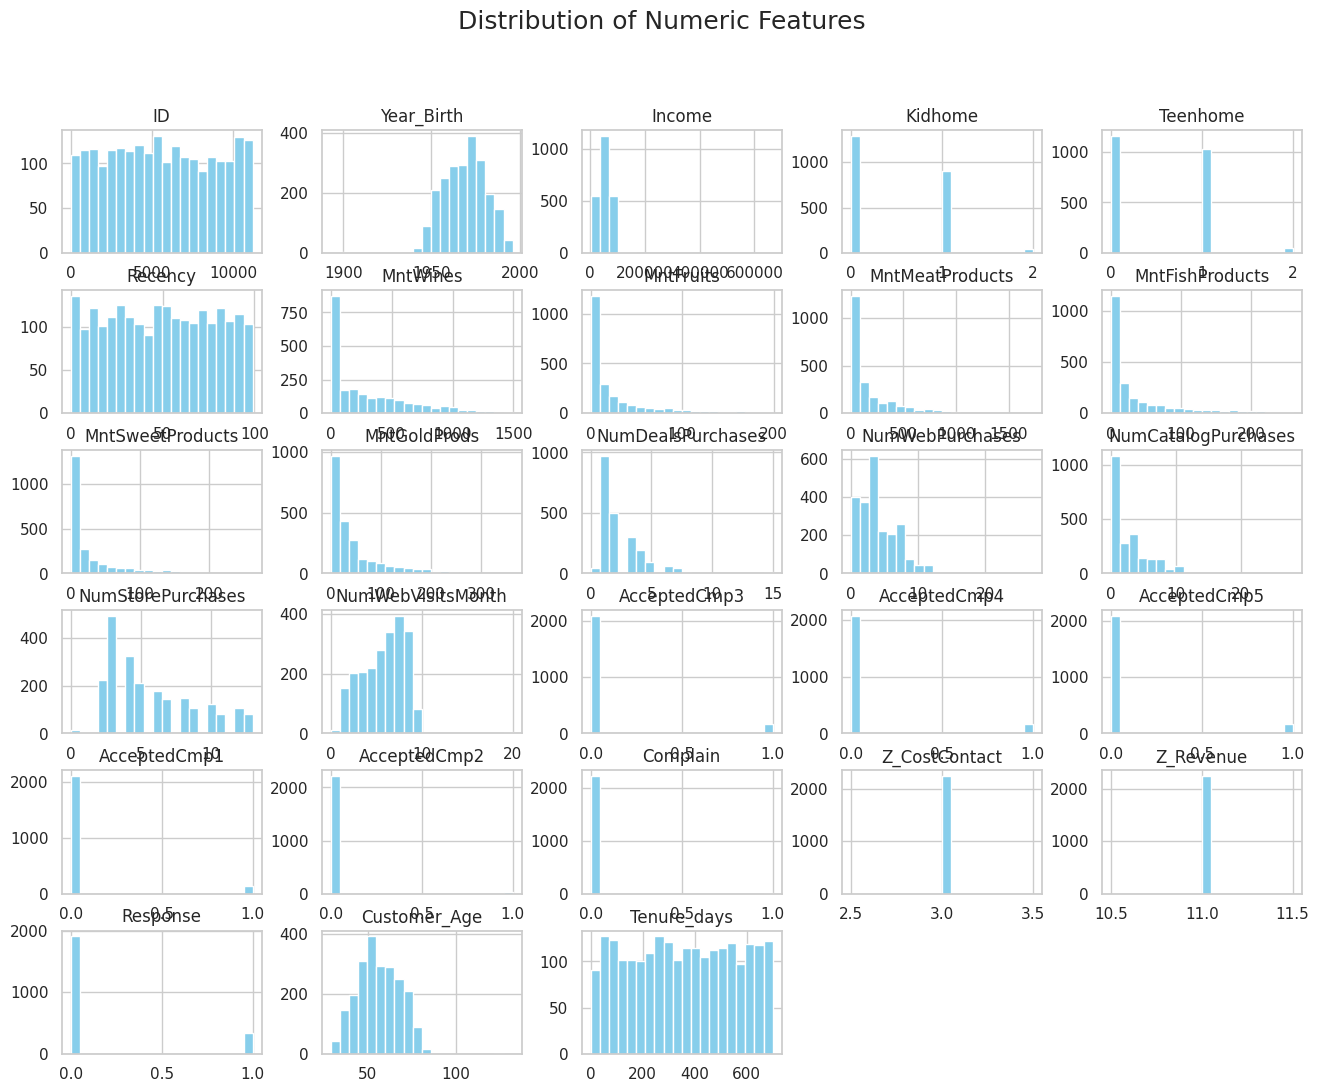

In [20]:

#  Step 5: Numeric Feature Distributions
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(16,12))
df[num_cols].hist(figsize=(16,12), bins=20, color='skyblue')
plt.suptitle("Distribution of Numeric Features", fontsize=18)
plt.show()

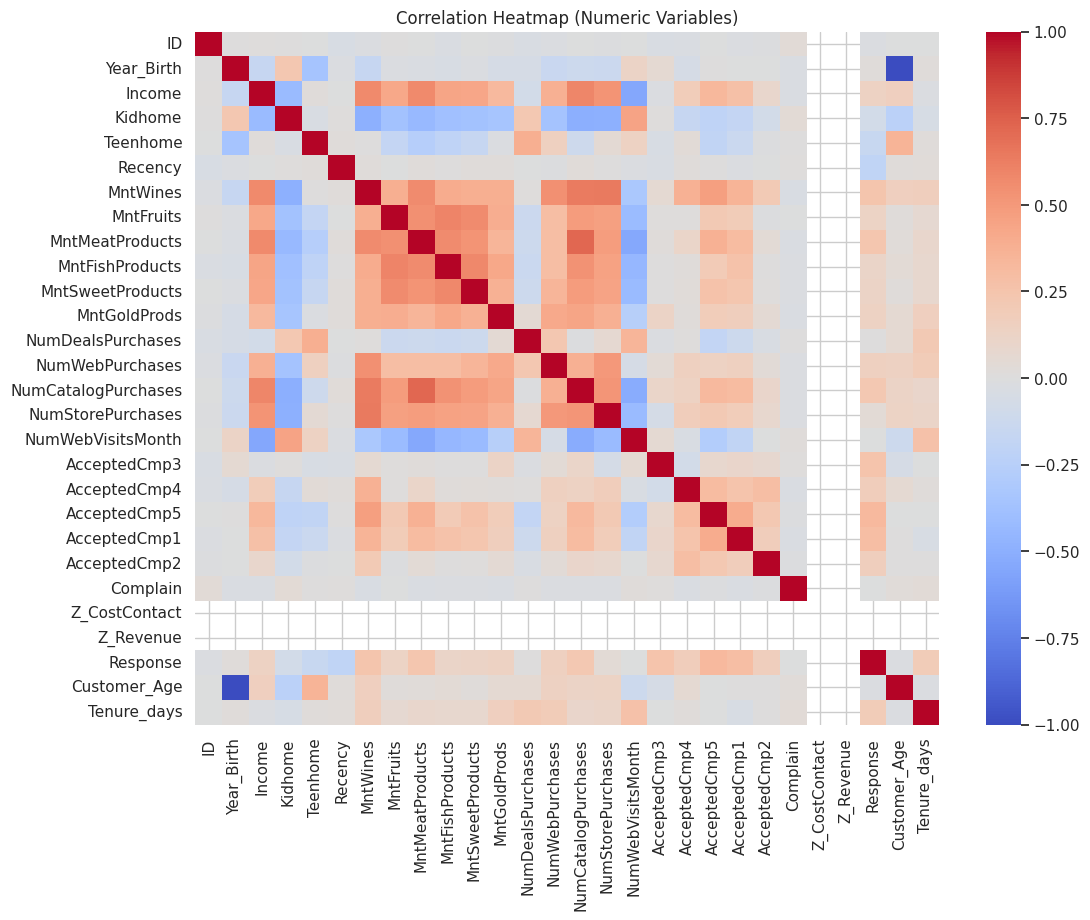

In [21]:

#  Step 6: Correlation Analysis

plt.figure(figsize=(12,9))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numeric Variables)")
plt.show()

,Income,MntWines,MntMeatProducts,MntGoldProds
Education,,,,
PhD,56096.303498,404.495885,168.602881,32.310700
Master,52896.777027,333.075676,163.378378,40.397297
Graduation,52707.305679,284.268855,179.488909,50.849157
2n Cycle,47688.583744,198.182266,141.256158,46.399015
Basic,20306.259259,7.240741,11.444444,22.833333


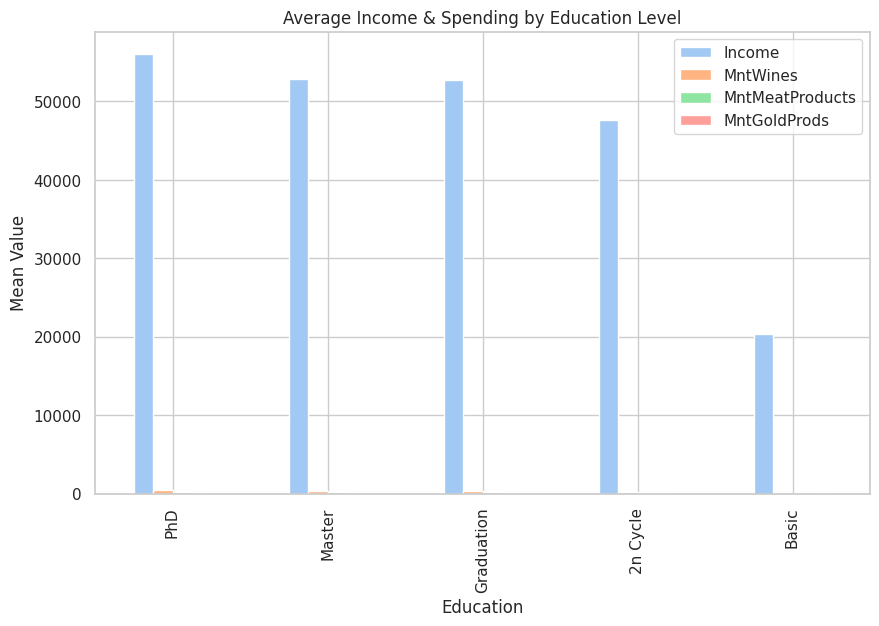

In [22]:

#  Step 7: Education vs Income & Spending
edu_spend = df.groupby("Education")[["Income", "MntWines", "MntMeatProducts", "MntGoldProds"]].mean().sort_values("Income", ascending=False)
display(edu_spend)

edu_spend.plot(kind='bar', figsize=(10,6))
plt.title("Average Income & Spending by Education Level")
plt.ylabel("Mean Value")
plt.show()

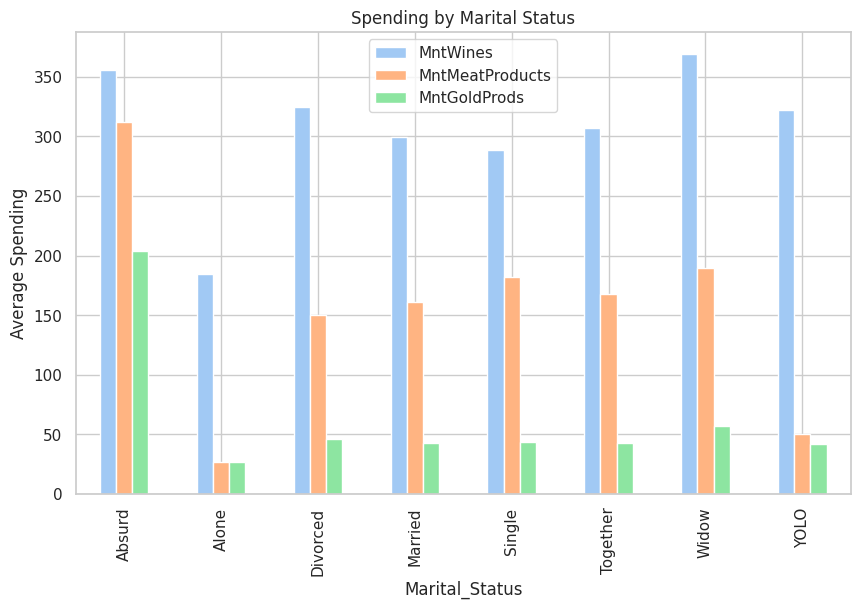

In [23]:

#  Step 8: Marital Status vs Spending
marital_spend = df.groupby("Marital_Status")[["MntWines", "MntMeatProducts", "MntGoldProds"]].mean()
marital_spend.plot(kind='bar', figsize=(10,6))
plt.title("Spending by Marital Status")
plt.ylabel("Average Spending")
plt.show()

/tmp/ipython-input-2616302524.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Total_Kids", data=df, palette="pastel")


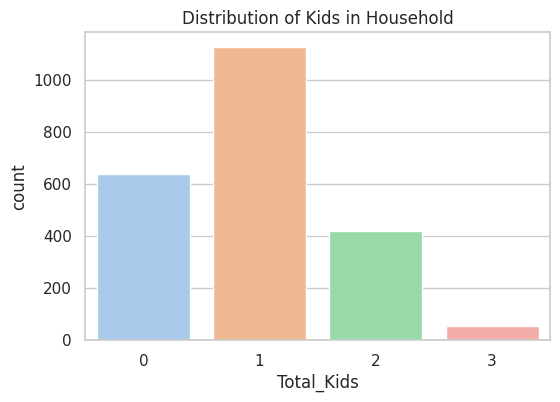

In [24]:

# Step 9: Family Composition
df["Total_Kids"] = df["Kidhome"] + df["Teenhome"]

plt.figure(figsize=(6,4))
sns.countplot(x="Total_Kids", data=df, palette="pastel")
plt.title("Distribution of Kids in Household")
plt.show()

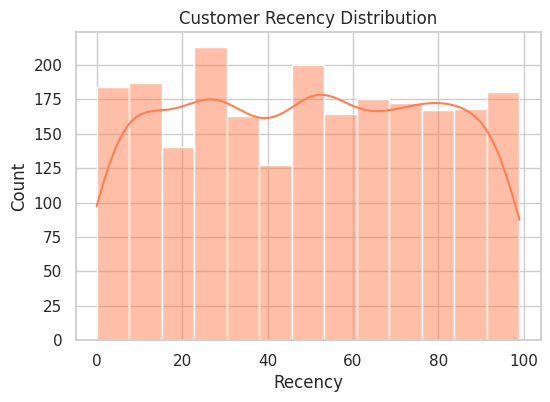

/tmp/ipython-input-1186483352.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Response", data=df, palette="Set2")


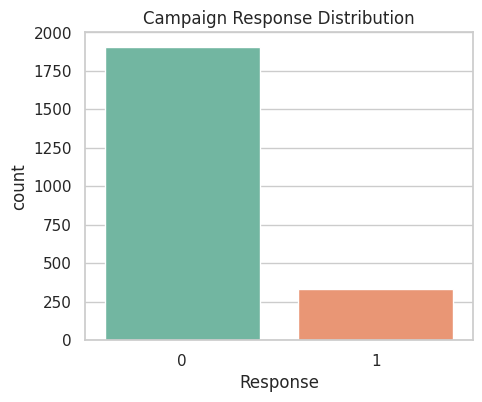

In [25]:

#  Step 10: Recency & Response Behavior
plt.figure(figsize=(6,4))
sns.histplot(df["Recency"], kde=True, color='coral')
plt.title("Customer Recency Distribution")
plt.show()

plt.figure(figsize=(5,4))
sns.countplot(x="Response", data=df, palette="Set2")
plt.title("Campaign Response Distribution")
plt.show()

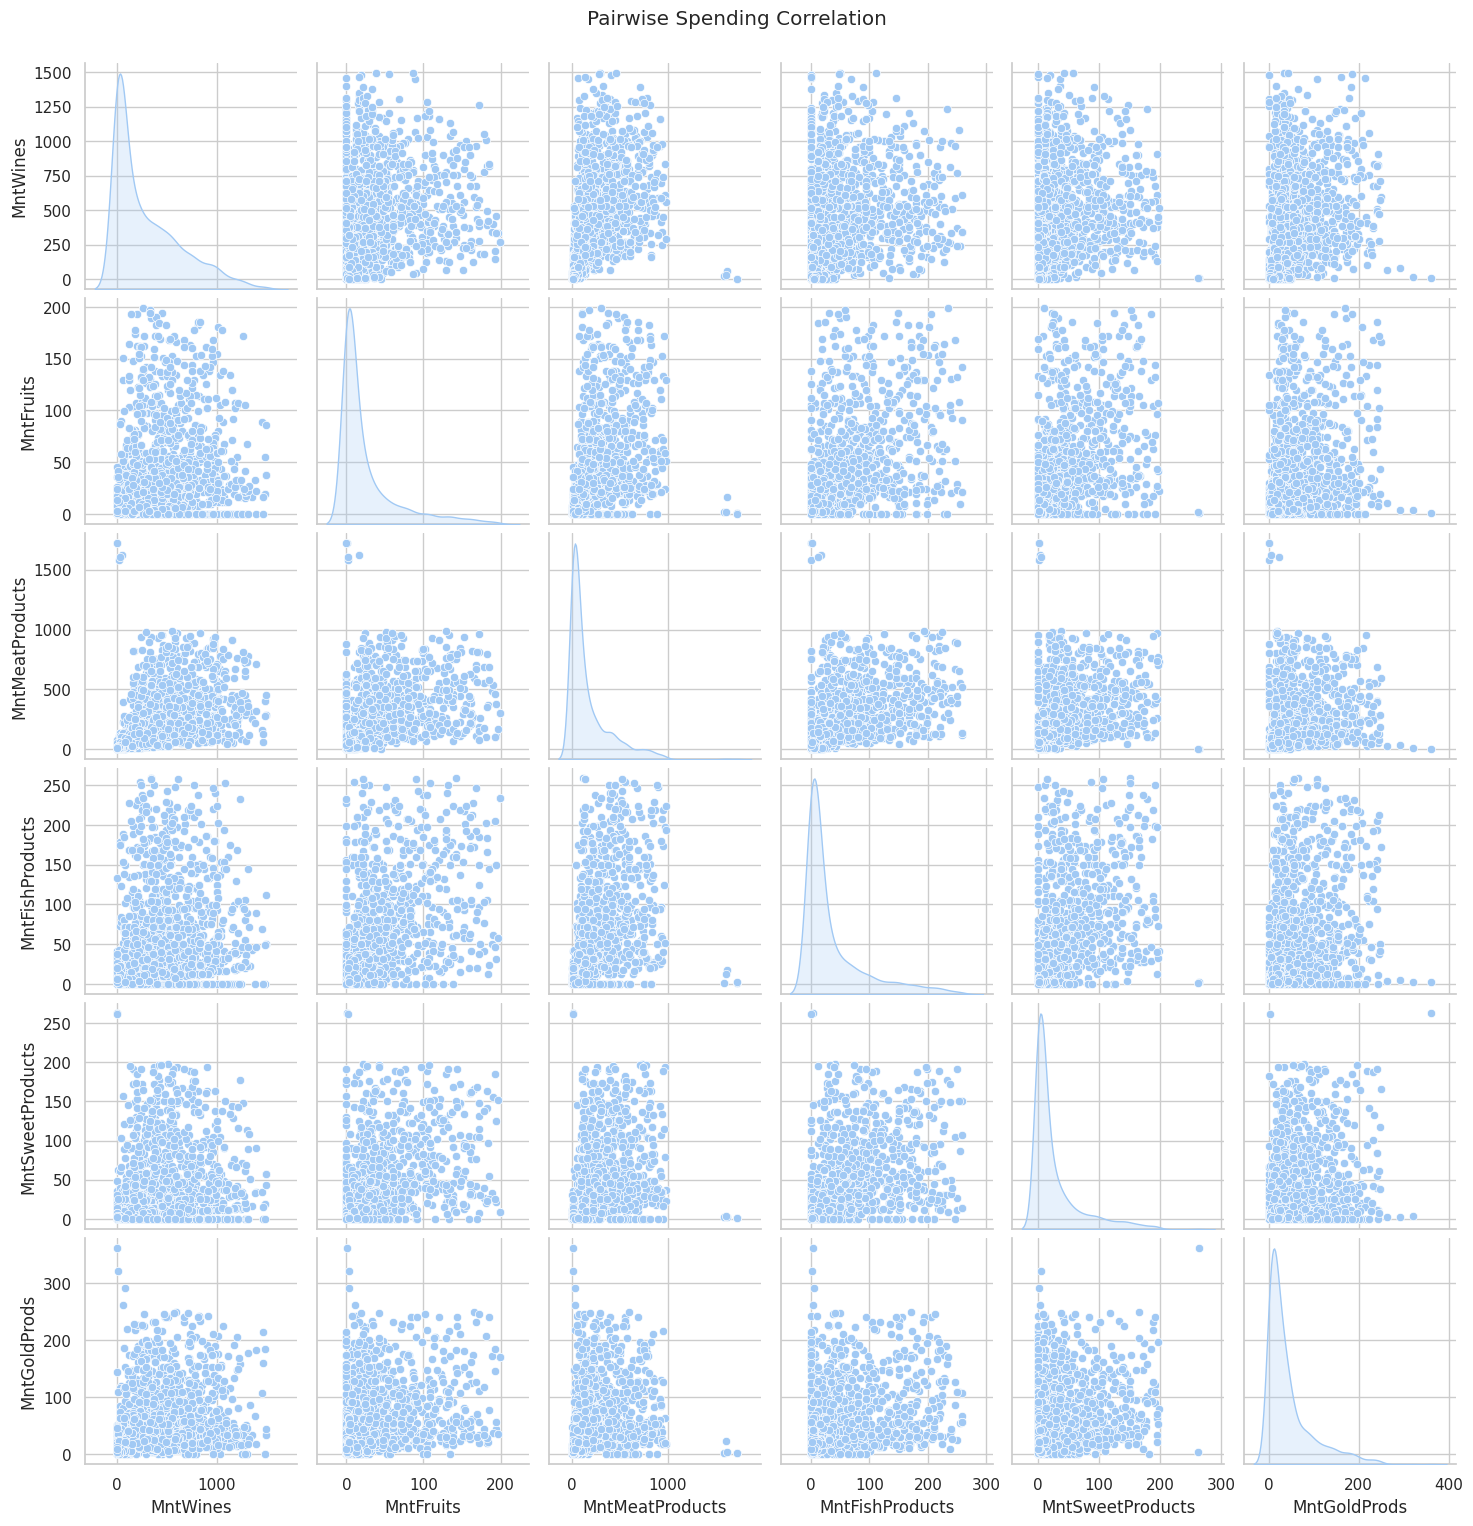

In [26]:

#  Step 11: Product Spending Correlations
spend_cols = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
sns.pairplot(df[spend_cols], diag_kind="kde")
plt.suptitle("Pairwise Spending Correlation", y=1.02)
plt.show()

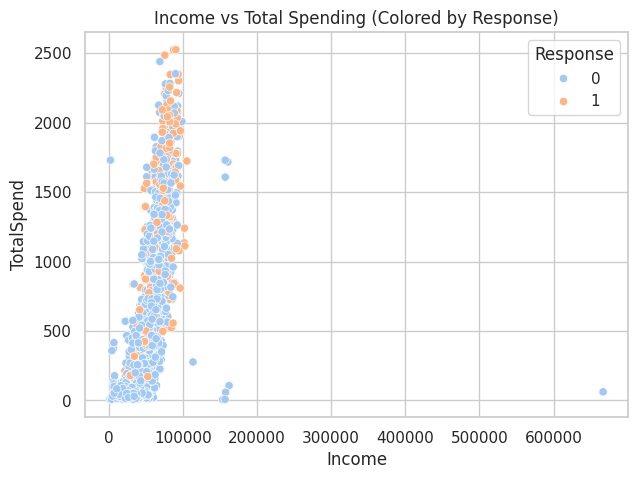

In [27]:
#  Step 12: Income vs Total Spending
df["TotalSpend"] = df[spend_cols].sum(axis=1)
plt.figure(figsize=(7,5))
sns.scatterplot(x="Income", y="TotalSpend", hue="Response", data=df)
plt.title("Income vs Total Spending (Colored by Response)")
plt.show()

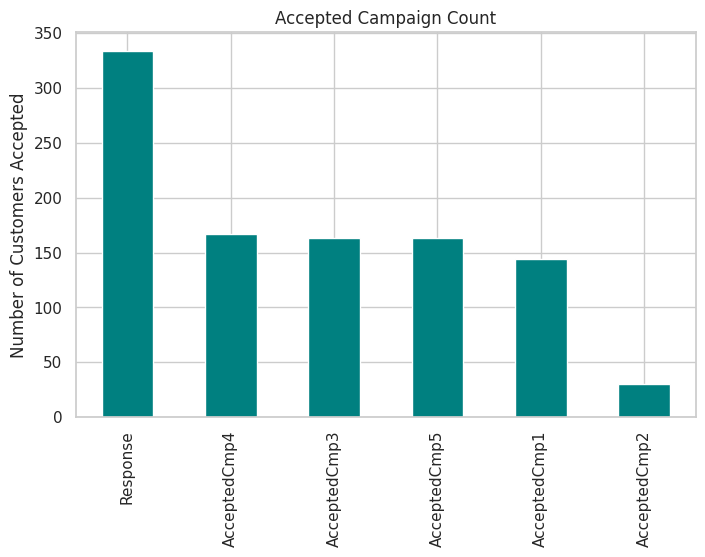

In [28]:
#  Step 13: Campaign Acceptance Analysis
cmp_cols = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]
cmp_sums = df[cmp_cols].sum().sort_values(ascending=False)
cmp_sums.plot(kind="bar", color="teal", figsize=(8,5))
plt.title("Accepted Campaign Count")
plt.ylabel("Number of Customers Accepted")
plt.show()

In [31]:

#  Step 14: Key Insights Summary
print("1️ Most customers are between ages 35–60 → mid-aged buyers dominate.")
print("2️ Higher education correlates with higher income and wine/meat spending.")
print("3️ Married or together customers spend more on premium products (Gold & Wine).")
print("4️ Families with fewer kids tend to have higher total spending.")
print("5️ Customers with lower Recency (recently active) respond better to campaigns.")
print("6️ Strong positive correlation among all product spending variables (cross-category buying).")
print("7️ Income and total spending show a moderate positive correlation — wealthier customers spend more.")
print("8️ Campaign 3 and the last response campaign have highest acceptance rates.")

print(" Stage 1 EDA completed successfully!")

1️ Most customers are between ages 35–60 → mid-aged buyers dominate.
2️ Higher education correlates with higher income and wine/meat spending.
3️ Married or together customers spend more on premium products (Gold & Wine).
4️ Families with fewer kids tend to have higher total spending.
5️ Customers with lower Recency (recently active) respond better to campaigns.
6️ Strong positive correlation among all product spending variables (cross-category buying).
7️ Income and total spending show a moderate positive correlation — wealthier customers spend more.
8️ Campaign 3 and the last response campaign have highest acceptance rates.
 Stage 1 EDA completed successfully!
